In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

In [3]:
data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
print(data)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [4]:
def split(seq,n_steps):
  X = []
  y =[]
  for i in range(len(seq)):
    lastindex = i + n_steps
    if lastindex > len(seq)-1:
      break
    seq_X = seq[i:lastindex]
    seq_y = seq[lastindex]
    X.append(seq_X)
    y.append(seq_y)
    pass
  X = np.array(X)
  y = np.array(y)
  return np.array(X),np.array(y)

In [5]:
n_steps = 7
X,y = split(data,n_steps)

In [6]:
X

array([[ 10,  20,  30,  40,  50,  60,  70],
       [ 20,  30,  40,  50,  60,  70,  80],
       [ 30,  40,  50,  60,  70,  80,  90],
       [ 40,  50,  60,  70,  80,  90, 100],
       [ 50,  60,  70,  80,  90, 100, 110],
       [ 60,  70,  80,  90, 100, 110, 120],
       [ 70,  80,  90, 100, 110, 120, 130],
       [ 80,  90, 100, 110, 120, 130, 140],
       [ 90, 100, 110, 120, 130, 140, 150],
       [100, 110, 120, 130, 140, 150, 160],
       [110, 120, 130, 140, 150, 160, 170],
       [120, 130, 140, 150, 160, 170, 180],
       [130, 140, 150, 160, 170, 180, 190]])

In [7]:
y

array([ 80,  90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200])

In [8]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X[:2])

[[[10]
  [20]
  [30]
  [40]
  [50]
  [60]
  [70]]

 [[20]
  [30]
  [40]
  [50]
  [60]
  [70]
  [80]]]


In [9]:
model = tf.keras.Sequential()
model.add(layers.LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(layers.Dense(1))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.MeanSquaredError())

In [13]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 25918.0215 - val_loss: 21587.6074
Epoch 2/10
1/1 [==============================] - 0s 77ms/step - loss: 23974.1465 - val_loss: 20674.9766
Epoch 3/10
1/1 [==============================] - 0s 76ms/step - loss: 22939.3750 - val_loss: 20180.3828
Epoch 4/10
1/1 [==============================] - 0s 72ms/step - loss: 22318.3906 - val_loss: 19745.6738
Epoch 5/10
1/1 [==============================] - 0s 72ms/step - loss: 21826.0352 - val_loss: 19348.9395
Epoch 6/10
1/1 [==============================] - 0s 60ms/step - loss: 21396.4023 - val_loss: 18981.5000
Epoch 7/10
1/1 [==============================] - 0s 56ms/step - loss: 21002.0352 - val_loss: 18613.3496
Epoch 8/10
1/1 [==============================] - 0s 71ms/step - loss: 20618.5977 - val_loss: 18210.5957
Epoch 9/10
1/1 [==============================] - 0s 93ms/step - loss: 20214.5117 - val_loss: 17725.6543
Epoch 10/10
1/1 [==============================] - 0s 87m

In [14]:
test_data = np.array([90, 100, 110, 120, 130, 140, 150])
test_data = test_data.reshape((1, n_steps, n_features))
test_data

array([[[ 90],
        [100],
        [110],
        [120],
        [130],
        [140],
        [150]]])

In [15]:
predictNextNumber = model.predict(test_data, verbose=1)
print(predictNextNumber)

1/1 [==============================] - 0s 217ms/step
[[8.981507]]


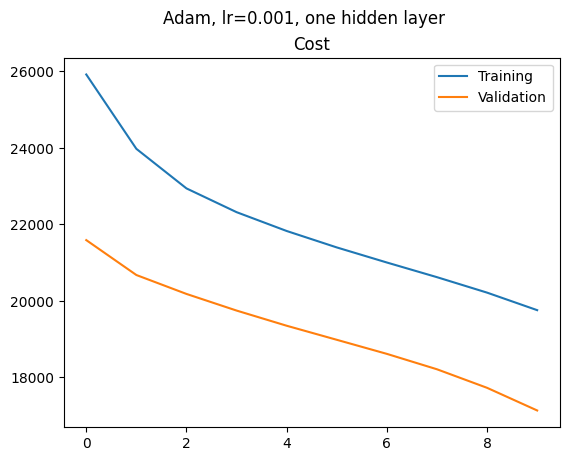

In [16]:
# Building graphs for the model:

fig = plt.figure()
fig.suptitle("Adam, lr=0.001, one hidden layer")

ax = fig.add_subplot(1,1, 1)
ax.set_title('Cost')
ax.plot(history.history['loss'], label='Training')
ax.plot(history.history['val_loss'], label='Validation')
ax.legend()
